In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

--2023-08-26 09:31:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   147MB/s    in 1.3s    

2023-08-26 09:31:13 (147 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [ ]:
import zipfile
train_zip = 'rps.zip'
to = '/content/'
with zipfile.ZipFile(train_zip, 'r') as zip_ref:
  zip_ref.extractall(to)

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-08-26 09:30:08--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  73.5MB/s    in 0.4s    

2023-08-26 09:30:09 (73.5 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [ ]:
test_zip = 'rps-test-set.zip'
to = '/content/'
with zipfile.ZipFile(test_zip, 'r') as zip_ref:
  zip_ref.extractall(to)

In [ ]:
train_dir = 'rps/'
paper_dir = '/content/rps/paper'
rock_dir = '/content/rps/rock'
scissors_dir = '/content/rps/scissors'

test_dir = 'rps-test-set/'
test_paper_dir = '/content/rps-test-set/paper'
test_rock_dir = '/content/rps-test-set/rock'
test_scissors_dir = '/content/rps-test-set/scissors'

In [ ]:
import os

print('TRAINING')
print('Total Paper Images for : ', len(os.listdir(paper_dir)))
print('Total Rock Images for : ', len(os.listdir(rock_dir)))
print('Total Scissor Images for : ', len(os.listdir(scissors_dir)))
print('-------------------------------------------')
print('TESTING')
print('Total Paper Images for : ', len(os.listdir(test_paper_dir)))
print('Total Rock Images for : ', len(os.listdir(test_rock_dir)))
print('Total Scissor Images for : ', len(os.listdir(test_scissors_dir)))

TRAINING
Total Paper Images for :  840
Total Rock Images for :  840
Total Scissor Images for :  840
-------------------------------------------
TESTING
Total Paper Images for :  124
Total Rock Images for :  124
Total Scissor Images for :  124


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape = (150,150,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(optimizer = 'RMSProp', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    class_mode = 'categorical',
                                                    batch_size = 120)

test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    class_mode = 'categorical',
                                                    batch_size = 120)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs = 10,
                    steps_per_epoch=20,
                    verbose = 1,
                    validation_data = test_generator)

Epoch 1/10
20/20 [==============================] - 86s 4s/step - loss: 1.6209 - accuracy: 0.3696 - val_loss: 1.0820 - val_accuracy: 0.3468
Epoch 2/10
20/20 [==============================] - 81s 4s/step - loss: 1.0637 - accuracy: 0.4300 - val_loss: 1.2672 - val_accuracy: 0.3333
Epoch 3/10
20/20 [==============================] - 84s 4s/step - loss: 1.0944 - accuracy: 0.4604 - val_loss: 0.8979 - val_accuracy: 0.7339
Epoch 4/10
20/20 [==============================] - 84s 4s/step - loss: 0.8909 - accuracy: 0.5996 - val_loss: 0.5858 - val_accuracy: 0.7984
Epoch 5/10
20/20 [==============================] - 81s 4s/step - loss: 0.7809 - accuracy: 0.6417 - val_loss: 0.7737 - val_accuracy: 0.6210
Epoch 6/10
20/20 [==============================] - 83s 4s/step - loss: 0.6768 - accuracy: 0.6921 - val_loss: 0.3891 - val_accuracy: 0.8763
Epoch 7/10
20/20 [==============================] - 82s 4s/step - loss: 0.7230 - accuracy: 0.6871 - val_loss: 0.3818 - val_accuracy: 0.9543
Epoch 8/10
20/20 [==

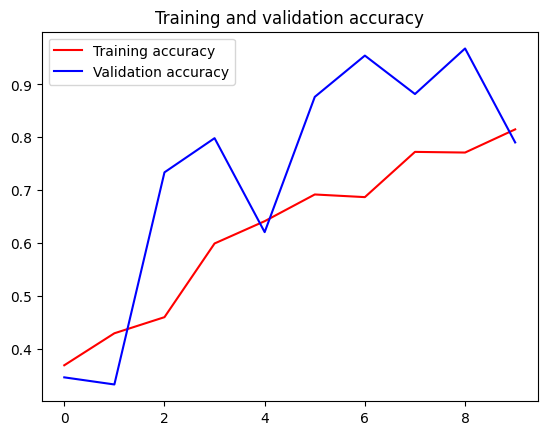

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()